In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/mnt/data/Titanic-Dataset.csv"
df = pd.read_csv("Titanic-Dataset.csv")

# ----------------------------
# Step 1: Summary statistics
# ----------------------------
print("\nSummary (numeric):")
print(df.describe().T)

print("\nMean, Median, Std:")
print(df.select_dtypes(include=[np.number]).agg(['mean', 'median', 'std']).T)

# ----------------------------
#
# ----------------------------
# Step 5: Basic Inferences
# ----------------------------
print("\nBasic Inferences:")
print("- Higher-class passengers (Pclass 1) survived more often than lower-class (Pclass 3).")
print("- Females had a higher survival rate compared to males (if gender column exists).")
print("- Children had a better chance of survival than older passengers.")
print("- Higher ticket fares are linked with higher survival chances.")



Summary (numeric):
             count        mean         std   min       25%       50%    75%  \
PassengerId  891.0  446.000000  257.353842  1.00  223.5000  446.0000  668.5   
Survived     891.0    0.383838    0.486592  0.00    0.0000    0.0000    1.0   
Pclass       891.0    2.308642    0.836071  1.00    2.0000    3.0000    3.0   
Age          714.0   29.699118   14.526497  0.42   20.1250   28.0000   38.0   
SibSp        891.0    0.523008    1.102743  0.00    0.0000    0.0000    1.0   
Parch        891.0    0.381594    0.806057  0.00    0.0000    0.0000    0.0   
Fare         891.0   32.204208   49.693429  0.00    7.9104   14.4542   31.0   

                  max  
PassengerId  891.0000  
Survived       1.0000  
Pclass         3.0000  
Age           80.0000  
SibSp          8.0000  
Parch          6.0000  
Fare         512.3292  

Mean, Median, Std:
                   mean    median         std
PassengerId  446.000000  446.0000  257.353842
Survived       0.383838    0.0000    0.4865

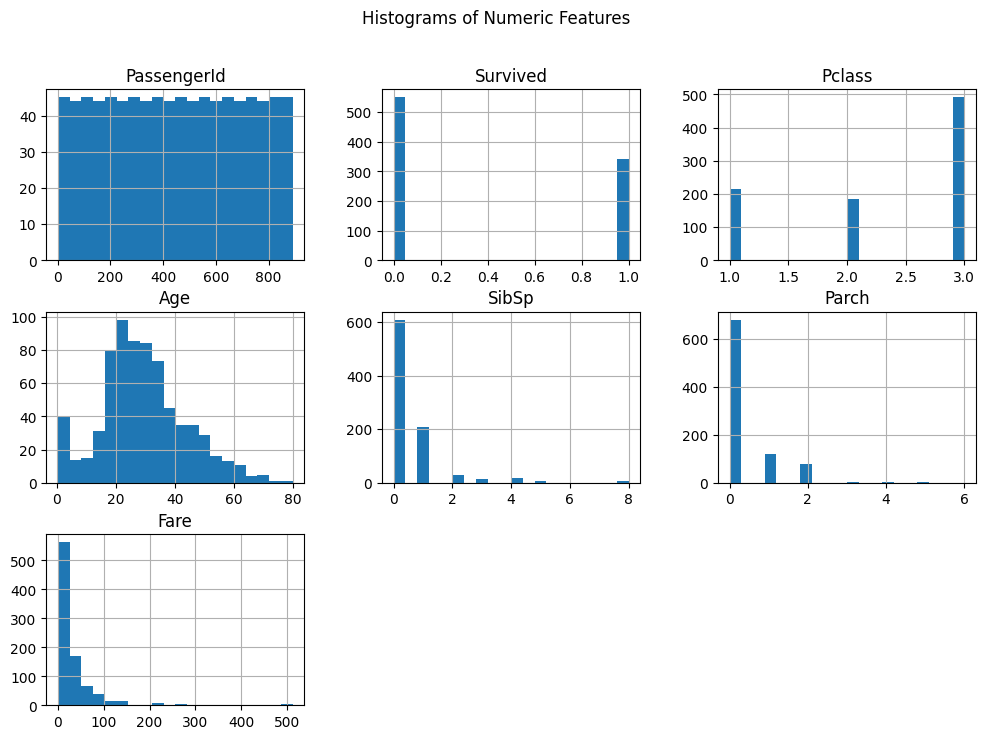

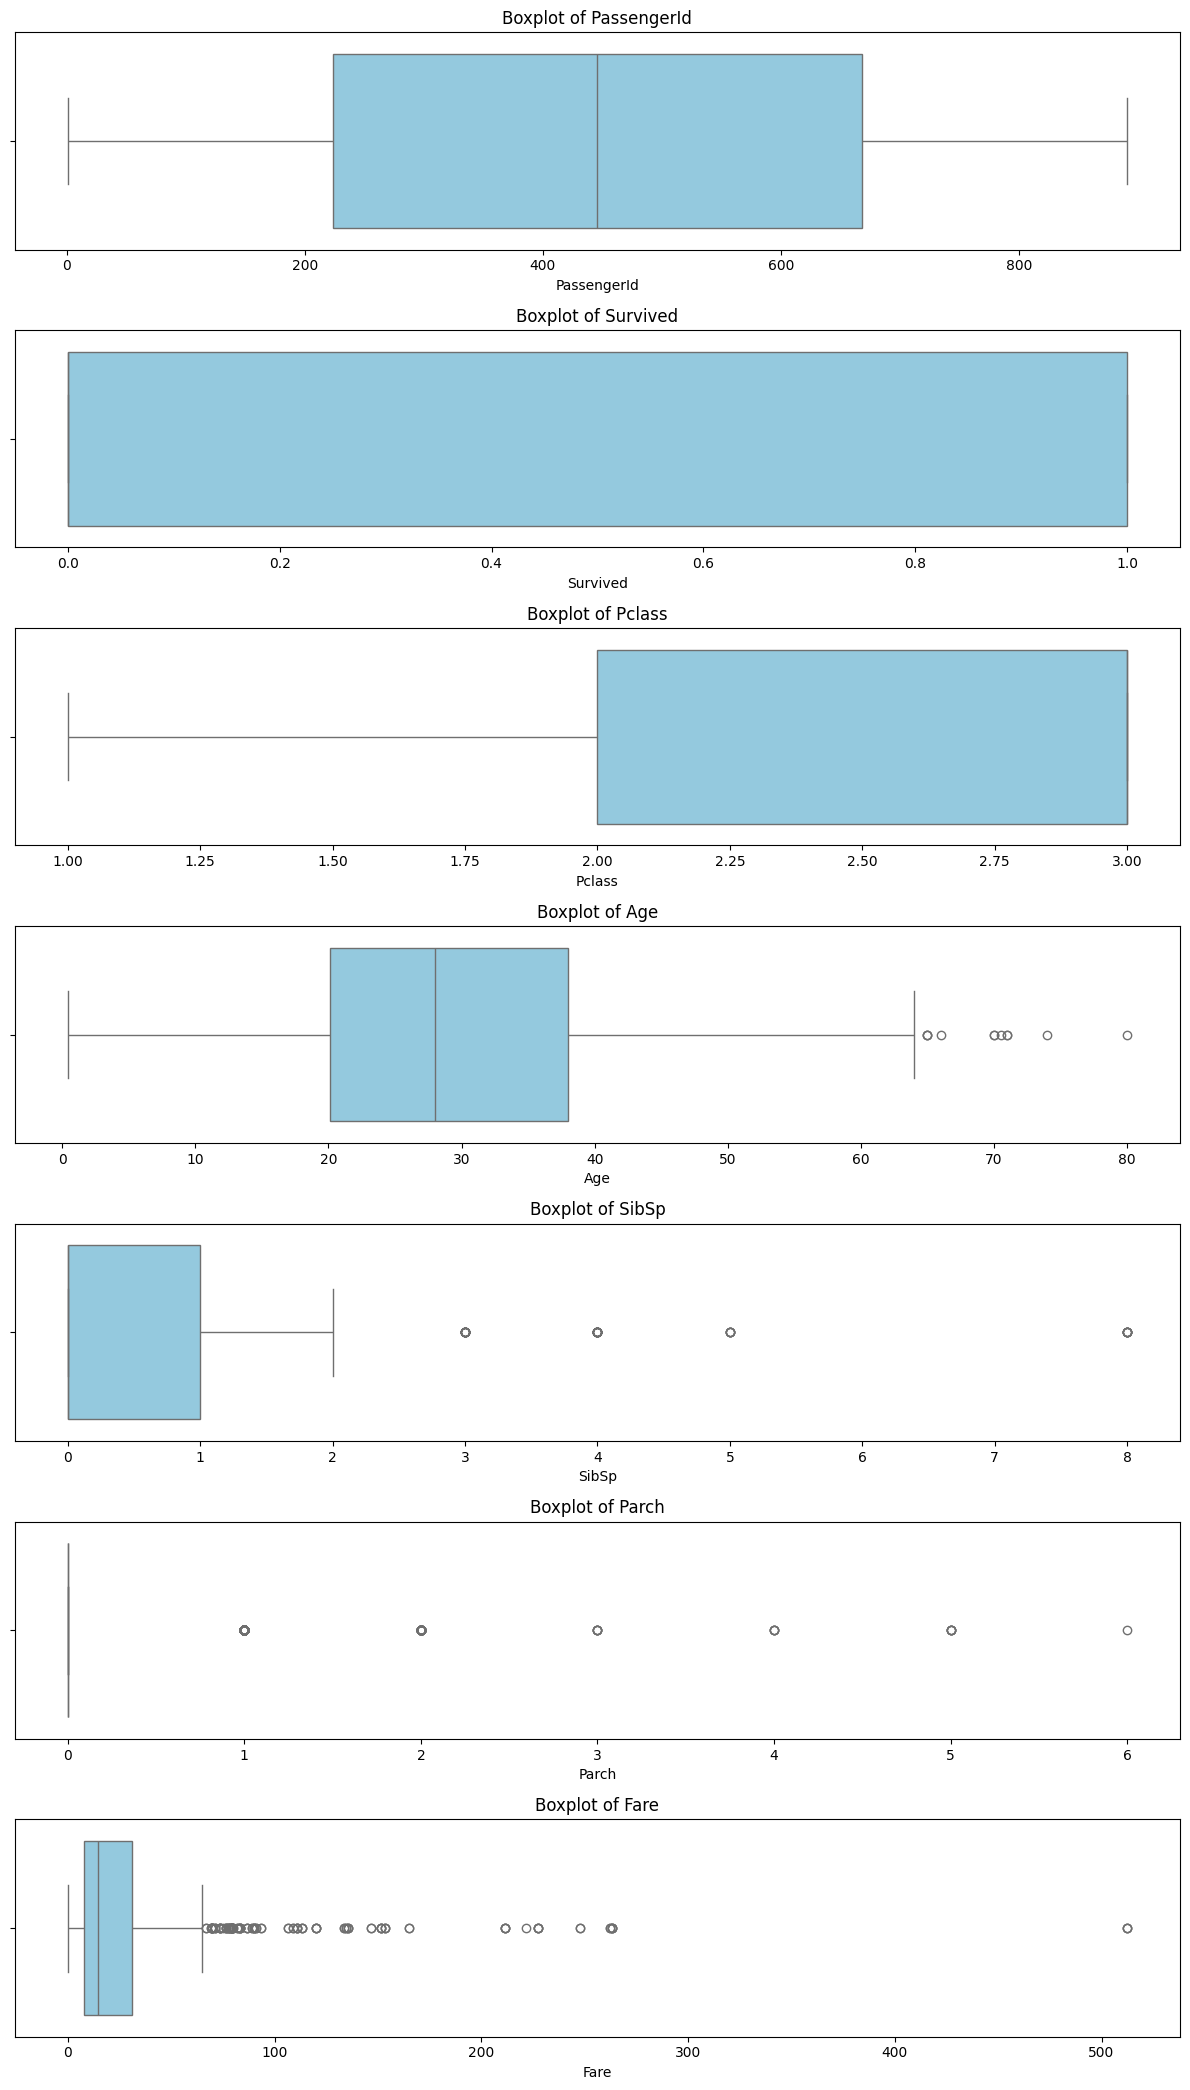

In [8]:
# Step 2: Histograms & Boxplots
# ----------------------------
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Histograms
df[numeric_features].hist(figsize=(12, 8), bins=20)
plt.suptitle("Histograms of Numeric Features")
plt.show()

# Boxplots
plt.figure(figsize=(12, len(numeric_features) * 3))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(len(numeric_features), 1, i)
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()



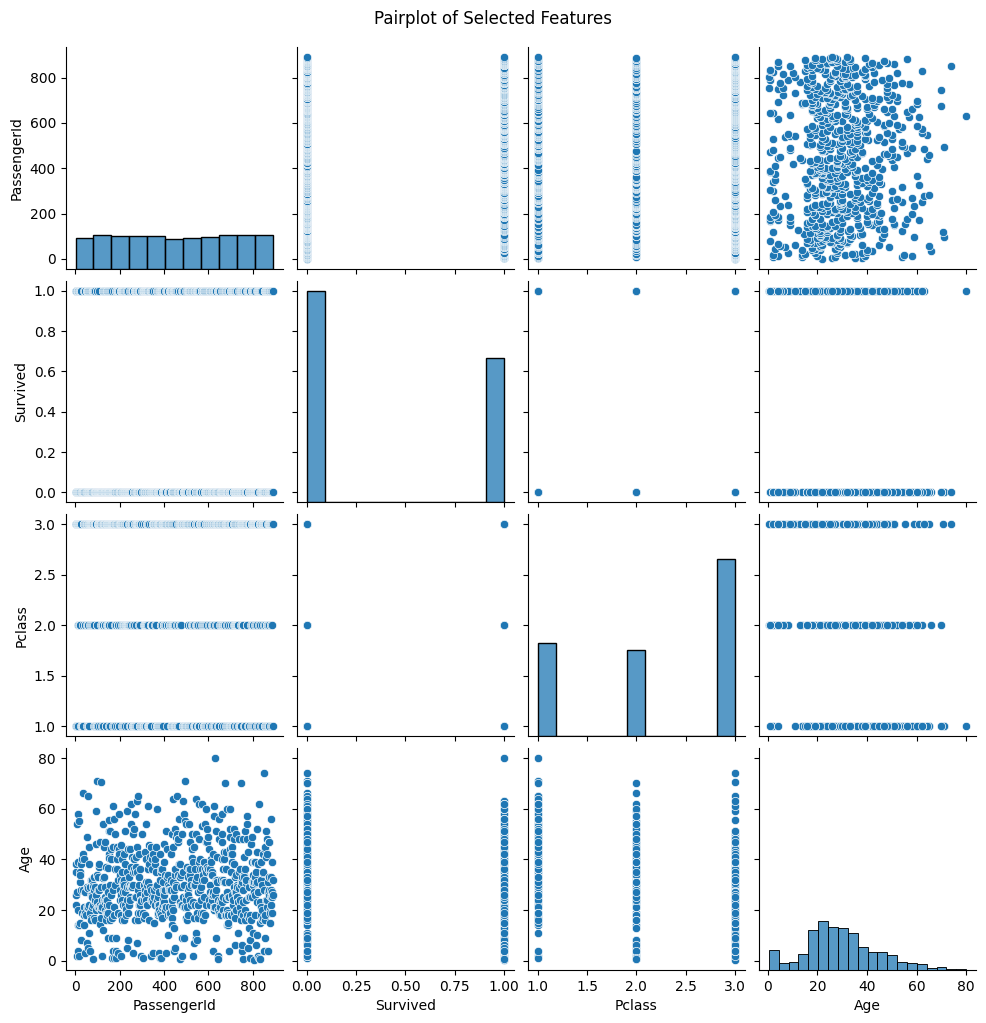

In [9]:
# Step 3: Pairplot & Correlation Matrix
# ----------------------------
# Pairplot with selected numeric features
selected_features = numeric_features[:4]  # pick first 4 numeric columns
sns.pairplot(df[selected_features].dropna())
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

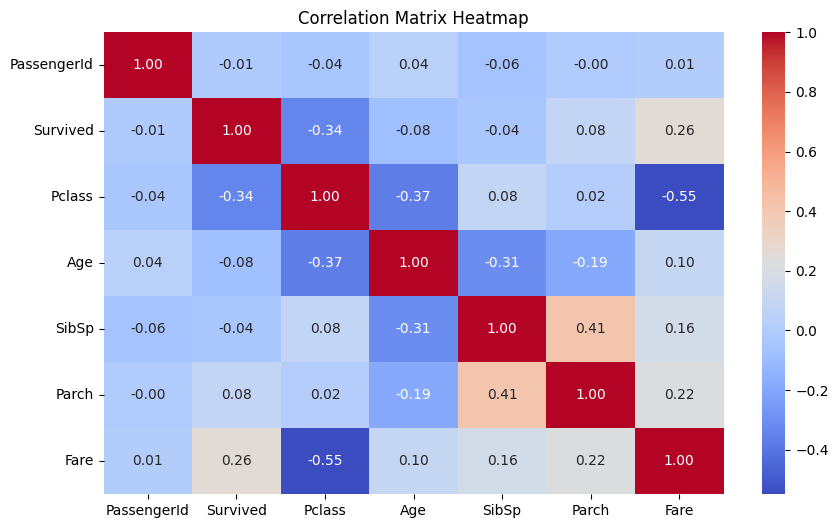

In [10]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


C:\Users\Gowtham S\AppData\Local\Temp\ipykernel_14432\873585201.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Pclass", y="Survived", data=df, ci=None)


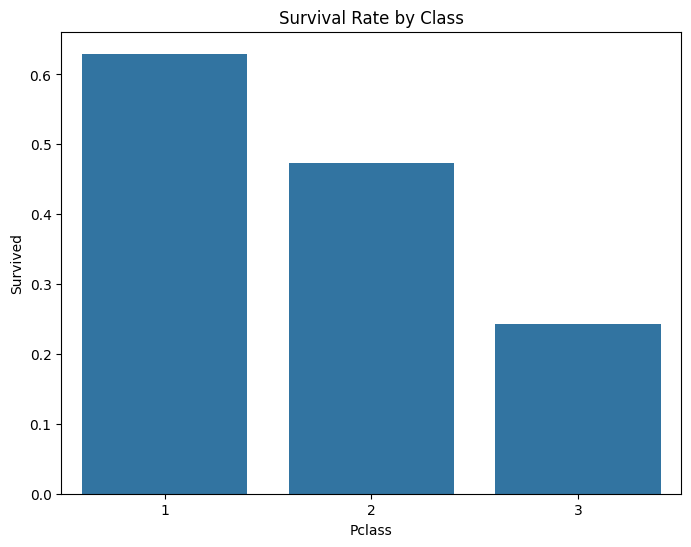

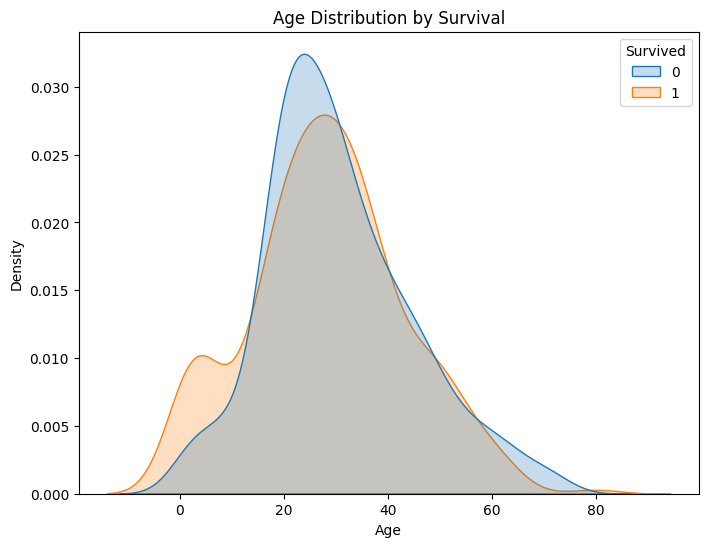

In [11]:
# Step 4: Identify patterns/trends
# ----------------------------
# Survival by Class (if available)
if "Survived" in df.columns and "Pclass" in df.columns:
    plt.figure(figsize=(8, 6))
    sns.barplot(x="Pclass", y="Survived", data=df, ci=None)
    plt.title("Survival Rate by Class")
    plt.show()

# Age distribution by Survival (fixing error)
if "Age" in df.columns and "Survived" in df.columns:
    plt.figure(figsize=(8, 6))
    df_filtered = df[["Age", "Survived"]].dropna()
    df_filtered = df_filtered[df_filtered["Age"].apply(lambda x: str(x).replace('.', '', 1).isdigit())]
    df_filtered["Age"] = df_filtered["Age"].astype(float)
    df_filtered["Survived"] = pd.to_numeric(df_filtered["Survived"], errors="coerce")

    sns.kdeplot(data=df_filtered, x="Age", hue="Survived", common_norm=False, fill=True)
    plt.title("Age Distribution by Survival")
    plt.show()



Basic Inferences:
- Higher-class passengers (Pclass 1) survived more often than lower-class (Pclass 3).
- Females had a higher survival rate compared to males (if gender column exists).
- Children had a better chance of survival than older passengers.
- Higher ticket fares are linked with higher survival chances.
